# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
import warnings 
warnings.filterwarnings("ignore")
!pip install folium


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\rusta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)
m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df = df.drop('dropoff_datetime', axis=1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

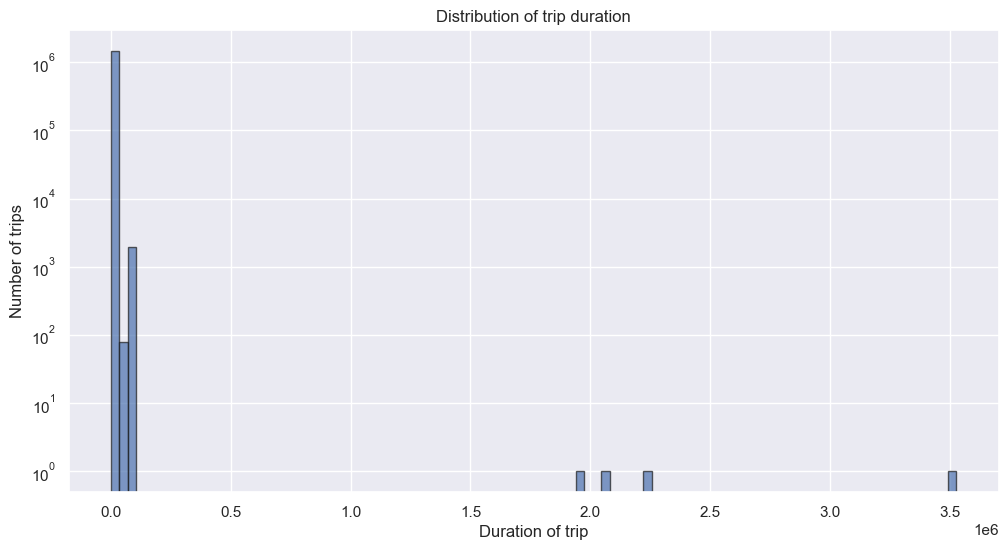

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['trip_duration'], bins=100, edgecolor='k', alpha=0.7)
plt.yscale('log')  
plt.xlabel('Duration of trip')
plt.ylabel('Number of trips')
plt.title('Distribution of trip duration')
plt.show()




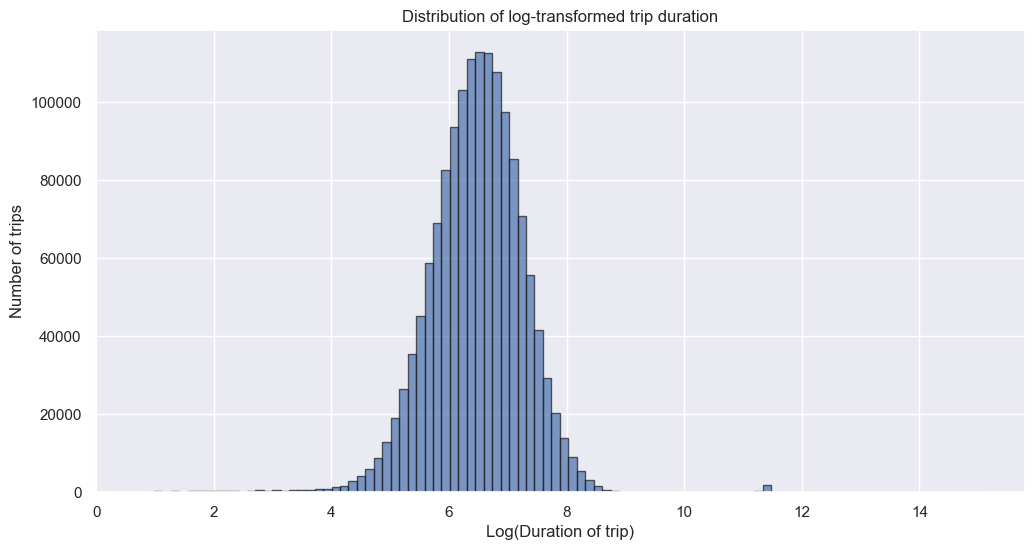

In [7]:
log_trip_duration = np.log1p(df['trip_duration'])

plt.figure(figsize=(12, 6))
plt.hist(log_trip_duration, bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('Log(Duration of trip)')
plt.ylabel('Number of trips')
plt.title('Distribution of log-transformed trip duration')
plt.show()


**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

*Из обычной гистограммы видно, что основная массса значений сосредоточена около нуля,при этом явно видно, что целевая перемнная имеет несколько выбросов в районе "2" и один в районе "3,5". Из логарифмированной шкаолы видно, что цеоевая перменная имеет нормальное распределение.*

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

*Я думаю, что авторы выбрали RMSLE по следующим причинам:*

1) Из гистограммы целевой переменной видно, что большая часть значений находится около нуля. Для таких данных полезно брать логарифм, так как это делает оценку более устойчивой к маленьким ошибкам.
2) RMSLE также менее чувствителе к большим выбросам, которые мы обнаружили на гистограмме целевой переменной
3) Использование RMSLE позволит корректно сопостовлять ошибки для коротких поездок, где отклонения относительно маленькие, и для длинных поездок, где ошибки относительно существенные

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство 1**:

Мы предположили, что $$\hat{y}_i = \log(y_i + 1)$$
Тогда $$\hat{y}_i - \hat{a}(x_i) = \log(y_i + 1) - \log(a(x_i) + 1)$$
Возьмем корень из MSE, получим RMSE (экв.)
Подставив это в формулу RMSE, получаем: $$ \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \left(\log(y_i + 1) - \log(a(x_i) + 1)\right)^2}$$, то есть RMSLE

Можно, наоборот, свести RMSLE К RMSE:
$$\text{RMSLE}(y, a(x)) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \left(\log(y_i + 1) - \log(a(x_i) + 1)\right)^2}$$
Так как $$\ln(1 + x) \approx x \quad \text{при} \quad x \approx 0$$
$$\text{RMSLE} \approx \text{RMSE} \implies \text{оптимизация RMSLE} = \text{оптимизации RMSE}$$
А оптимизация RMSE эквивалентна оптимизации MSE (доказали на семе)


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

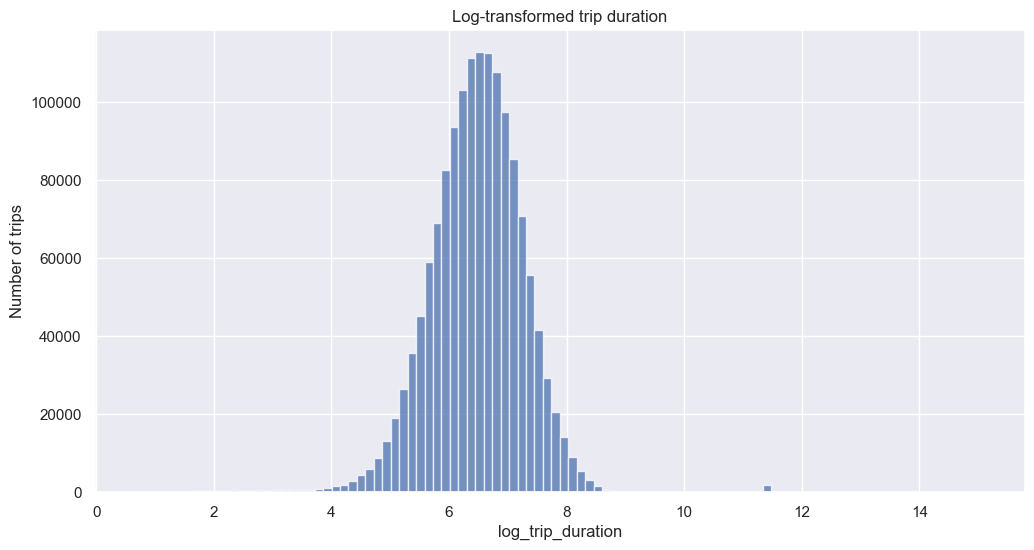

In [8]:
import numpy as np
import matplotlib.pyplot as plt

df['log_trip_duration'] = np.log1p(df['trip_duration'])

plt.figure(figsize=(12, 6))
plt.hist(df['log_trip_duration'], bins=100, alpha=0.75)
plt.title('Log-transformed trip duration')
plt.xlabel('log_trip_duration')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

df.drop(columns=['trip_duration'], inplace=True)
# GPT запрос - условие задания (Итак,...)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
def rmsle(log1p_y_true, log1p_y_pred): 
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

best_const = df['log_trip_duration'].mean()
rmsle_best_const = rmsle(df['log_trip_duration'], np.full_like(df['log_trip_duration'], best_const))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)
# GPT- request


0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

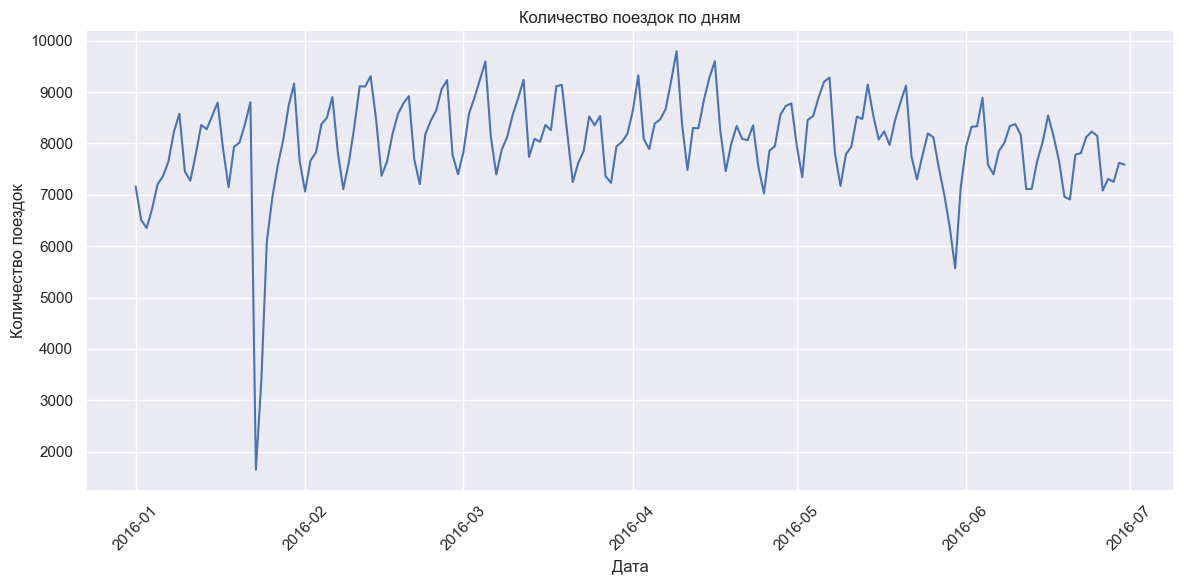

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['pickup_date'] = df['pickup_datetime'].dt.date

daily_trips = df.groupby('pickup_date').size().reset_index(name='trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trips, x='pickup_date', y='trips')
plt.title('Количество поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# запрос GPT на построение графика


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

*2016-01-23, 2016-01-24 - В Нью-Йорке из-за снежной бури запретили автомобильное движение*

*2016-05-30 -*

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [11]:
sorted_trips = daily_trips.sort_values(by='trips').head(5)
anomaly_dates = sorted_trips['pickup_date']
print(anomaly_dates)

22     2016-01-23
23     2016-01-24
150    2016-05-30
24     2016-01-25
2      2016-01-03
Name: pickup_date, dtype: object


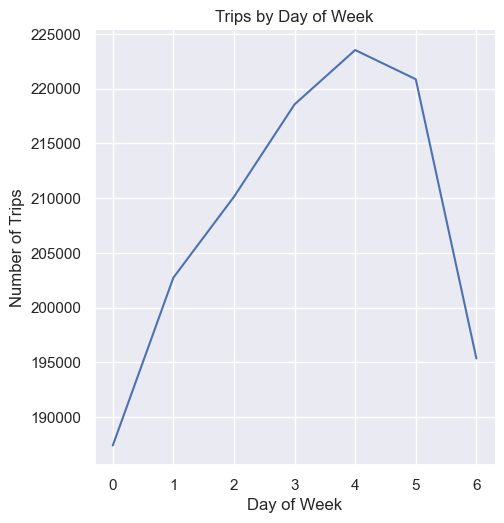

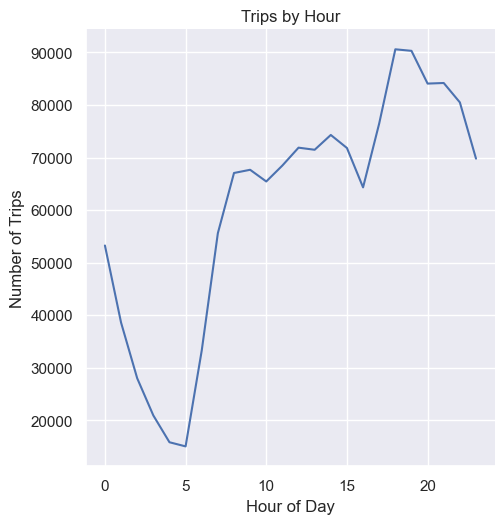

In [12]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0: понедельник, 1: вторник, ...
df['hour'] = df['pickup_datetime'].dt.hour

df_dayofweek = df.groupby('day_of_week').size().reset_index(name='count')

sns.relplot(data=df_dayofweek, x='day_of_week', y='count', kind='line')
plt.title("Trips by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

df_hour = df.groupby('hour').size().reset_index(name='count')

sns.relplot(data=df_hour, x='hour', y='count', kind='line')
plt.title("Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

#GPT-request - на построение графика


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

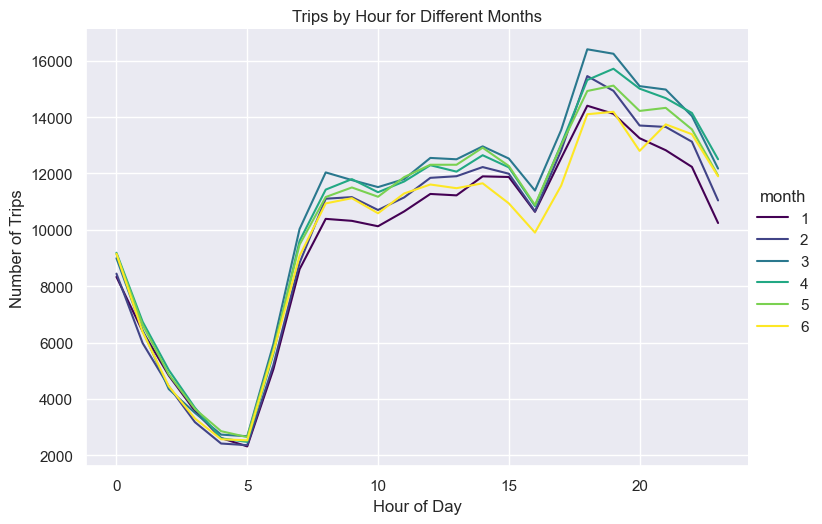

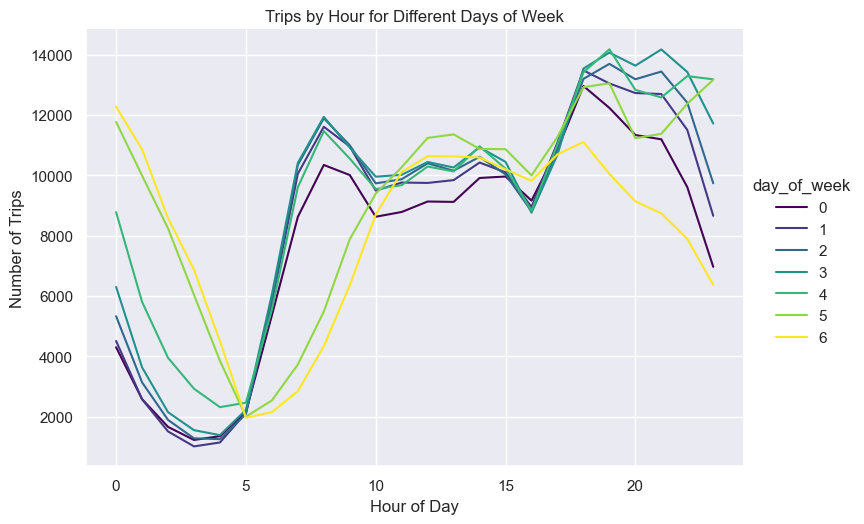

In [13]:
df['month'] = df['pickup_datetime'].dt.month

df_hour_month = df.groupby(['hour', 'month']).size().reset_index(name='count')

sns.relplot(data=df_hour_month, x='hour', y='count', hue='month', kind='line', palette='viridis', aspect=1.5)
plt.title("Trips by Hour for Different Months")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

df_hour_dayofweek = df.groupby(['hour', 'day_of_week']).size().reset_index(name='count')

sns.relplot(data=df_hour_dayofweek, x='hour', y='count', hue='day_of_week', kind='line', palette='viridis', aspect=1.5)
plt.title("Trips by Hour for Different Days of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()



**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

1) Достаточно высокая активность поездок наблюдается в полночь, когда люди могут возвращаться домой с ночных рейсов или с тусовок. Еще большая активность наблюдается в рабочие часы - 9-16 часов, так как люди осущестляют рабочие поездки, ездят на встречи и т.п., наибольшая активность наблюдается в вчерение часы - с 17 до 20 часов вечера - когда люди возвращаются с работы домой.
2) Динамика всех дней недел в плане распределения поездок по часам достаточно схожая - выделяется только воскресенье - поездок в полночь значительно больше, нет подъемов активности в вечерние часы, так как не надо ехать на работу. активность в полночь можно объяснить активным проведением выходных и возвращением с мест отдыха. В субботу и воскресенье также не наблюдается столь высокого количества поездок, как в рабочие дни в период с 5 до 10 утра, так как нет необходимости ехать на работу.
3) Распределение поездок по часам, рассматриваемых по месяцам, имеет достаточно похожий характер.
4) В среднем люди примерно одинаково часто полюзуются такси в зависимости от дня недели, однако если учитывать незначительные отклонения, пик поездок приходится на пятницу. Ближе к концу недели и началу количество поездокпадает. Это можно объяснить тем, что в начале недели люди обычно собраны и редко опаздывают, а концу недели уже устают, не успевают куда-то и заказывают такси. В выходные они отдыхают, поэтому количество поездок тоже снижается.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

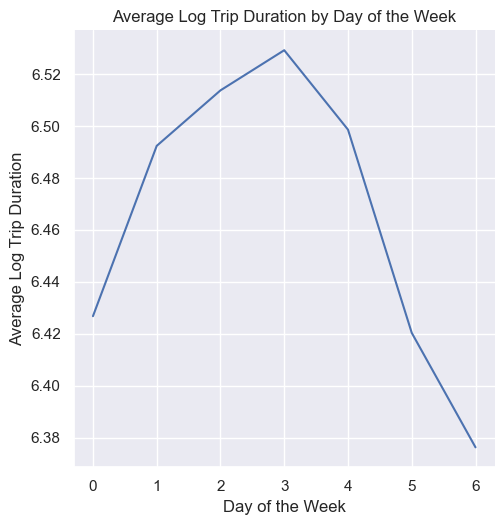

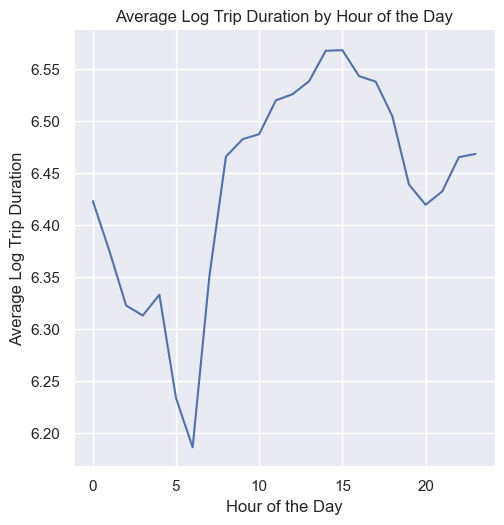

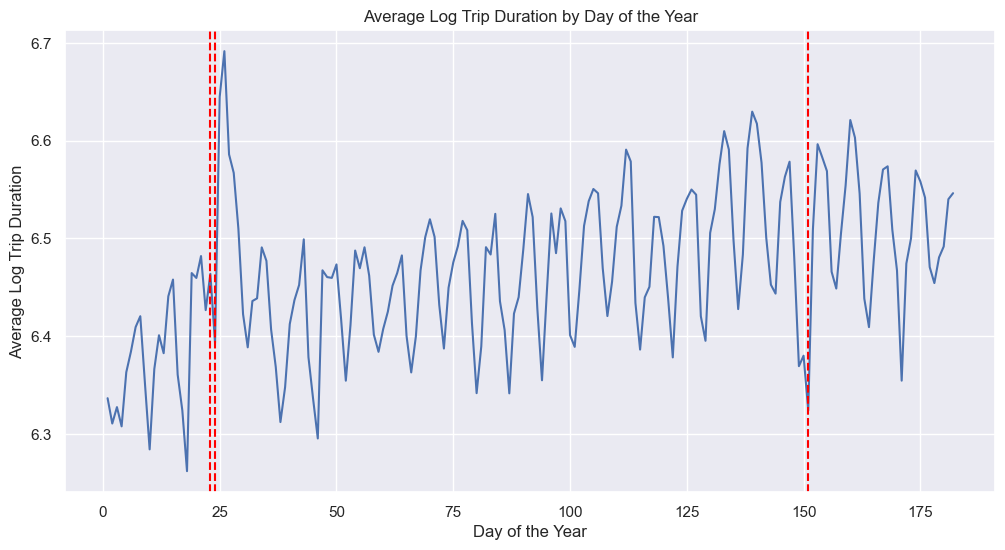

In [14]:
from sklearn.model_selection import train_test_split
from datetime import datetime

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

df_train['weekday'] = df_train['pickup_datetime'].dt.weekday
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['dayofyear'] = df_train['pickup_datetime'].dt.dayofyear

average_weekday = df_train.groupby('weekday')['log_trip_duration'].mean().reset_index()
average_hour = df_train.groupby('hour')['log_trip_duration'].mean().reset_index()
average_dayofyear = df_train.groupby('dayofyear')['log_trip_duration'].mean().reset_index()

sns.relplot(data=average_weekday, x='weekday', y='log_trip_duration', kind='line')
plt.title('Average Log Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Log Trip Duration')
plt.show()

sns.relplot(data=average_hour, x='hour', y='log_trip_duration', kind='line')
plt.title('Average Log Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Log Trip Duration')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_dayofyear, x='dayofyear', y='log_trip_duration')

important_dates = ["2016-01-23", "2016-01-24", "2016-05-30"]
for date in important_dates:
    day_of_year = datetime.strptime(date, "%Y-%m-%d").timetuple().tm_yday
    plt.axvline(x=day_of_year, color='red', linestyle='--')

plt.title('Average Log Trip Duration by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Log Trip Duration')
plt.show()

#запрос в чат ЖПТ - условие задания
# он посчтал не средние значения, попросил его исправитть
# в третьем графике вместо дат сделал просто номера дней, поросил его изменить это
# попросил выделить аномальные даты


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

*Граифик зависимости таргета от дня недели и от часа в сутках достаточно сильно отличаются от аналогичных для количества поездок. Например, мы видели, что наибольшее количество поездок осуществляется в пятницу, а наибольшая продольжительность поездок наблюдается в четверг. Мы также помниним, что наибольшее количество поездок приходилось на время, когда люди возвращались домой - часы с 17 до 20, а в граифке средней продолжительности поездки в зависимости от времени суток - наоборот, это время падает. И это на самом деле можно объяснить тем, что, когда л.ди возвращаются домой с работы - поездки обычно не такие длительные. И судя по тому, что, чем ближе к 20 - там короче поездки, оставаться поработать подольше хотят только те люди, которые, предположительно, живут недалеко от работы. Ну или просто пробки становятся меньше. Четкой зависимоти тут нет просто потому, что если поездок много - они необязательно должны быть все длинными. Скорее, эти два показателя никак не зависят друг от друга. Вот если бы мы брали суммарное количество времени в пути, а не среднее - то да, зависимость была бы. В первый аномальный период, прямо в два дня длительность поездок, наверное, была чуть ниже среднего. Это объяснимо тем, что поездок в целом было очень мало, так как движение было заблокировано. А длительных поездок много быть и не могло. А вот в последущие дни поездок стало очень много, так как люди, которые отложили длительные поездки из-за непогоды, все поехали в следующие дни, джополнительно удлинив свои поездки образовавшимися пробками. Во второй длительность поездок тоде значительно ниже среднего, что, опять же может обхясняться заблокированным движением и отсутсвием длительных поездок.В зависимости целевой переменной от номера дня в году действительно наблюдается восходящйи тренд - как будто люди ездили дольше в зависимости от времени (возможно, в целом в Нью-йорке стало больше машин и пробок)*

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

*Эти признаки уже были добавлены в предыдущих частях кода*

In [15]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_date,day_of_week,hour,month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,0,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,6,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,1,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,2,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,5,13,3


In [16]:

anomal_dates = ['2016-01-23', '2016-01-24', '2016-05-30']

df['is_anomal'] = df['pickup_date'].apply(lambda x: 1 if x in anomal_dates else 0)
df['dayofyear'] = df['pickup_datetime'].dt.dayofyear

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_date,day_of_week,hour,month,is_anomal,dayofyear
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,0,17,3,0,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,6,0,6,0,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,1,11,1,0,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,2,19,4,0,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,5,13,3,0,86


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Как категориальные:
1) часы
2) месяцы

Как численные:
1) дни недели
2) явлется ли период аномальным (этот признак не надо дополнительно кодировать - он и так бинарный)
3) номер дня в году
В иделе, все временные признаки надо рассматривать, как категориальные, однако рассмотрение некоторых из них создать слишком много лишних столбцов при применении OHE, поэтому будем рассматривать как категориальные только самые важные (часы) и маленькие по количеству значений (месяцы)
Остальные характеристики трудно отнести как категориальным, так и к численным

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [17]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal']
categorial_features = ['hour', 'month']
all_features = numeric_features + categorial_features

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

rmsle = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle)



Test RMSLE = 0.7898


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [18]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [19]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?
1) Аэропорт Кеннеди (терминал 5, прибытия) - 40.64592046881505, -73.77654058583087
2) Аэропорт Кеннеди (терминад 4, отправления) - 40.64410739270207, -73.78240759537037
3) La Guardia Airport (терминал B) - 40.772887467360164, -73.87195376385047
4) La Guardia Airport (терминал C) - 40.77092825007454, -73.86483261846412
5) La Guardia Airport (Parking)  - 40.771128796327446, -73.86480160285197
6) South Ferry - 40.701552105255615, -74.01301049179831
7) World Trade Center - 40.711049154762016, -74.01241468373195
8) Grand Central Terminal - 40.75264823982336, -73.9771721309206
9) New York  Penn station - 40.75105954409153, -73.99146425832943

Эти места довольно популярны как среди местных, так и среди тусристов, поэтому в эти места люди готовы будут ехать издалека, следовательно, поездки в них должны быть длиннее

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [20]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points on the Earth
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371
    return c * r

df['haversine'] = df.apply(lambda row: haversine(row['pickup_latitude'], 
                                                             row['pickup_longitude'], 
                                                             row['dropoff_latitude'], 
                                                             row['dropoff_longitude']), axis=1)


# сделал GPT
# я дал ему функцию harvesine, показалал датафрейм и записал условие задания

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [21]:
df['log_haversine'] = np.log1p(df['haversine'])


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [22]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [23]:
df['trip_duration_sec'] = np.exp(df['log_trip_duration']) - 1

df['average_speed'] = round(df['haversine'] / (df['trip_duration_sec'] / 3600))
#добавил округление, чтобы было видно выьбросы

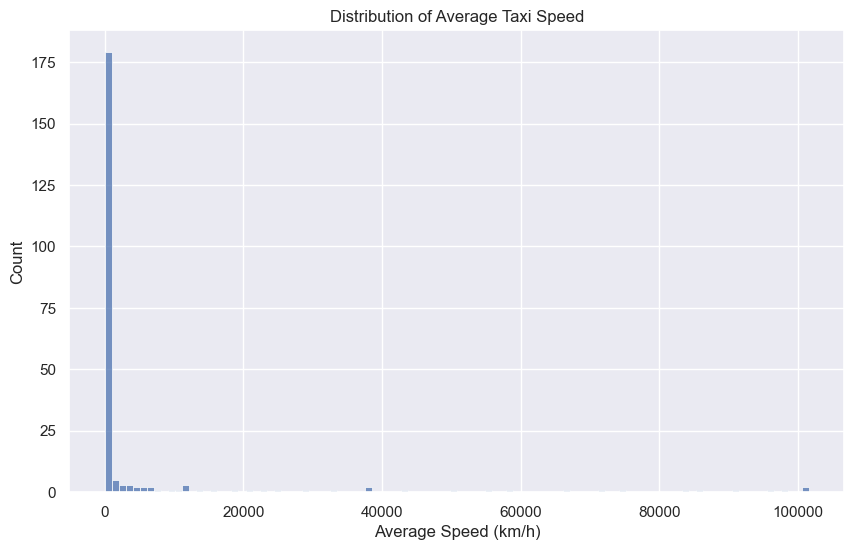

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_speed'].value_counts(), bins=100, kde=False)
plt.title('Distribution of Average Taxi Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Count')
plt.show()
#сделал в GPT, передал ему траблицу и условие задачи


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

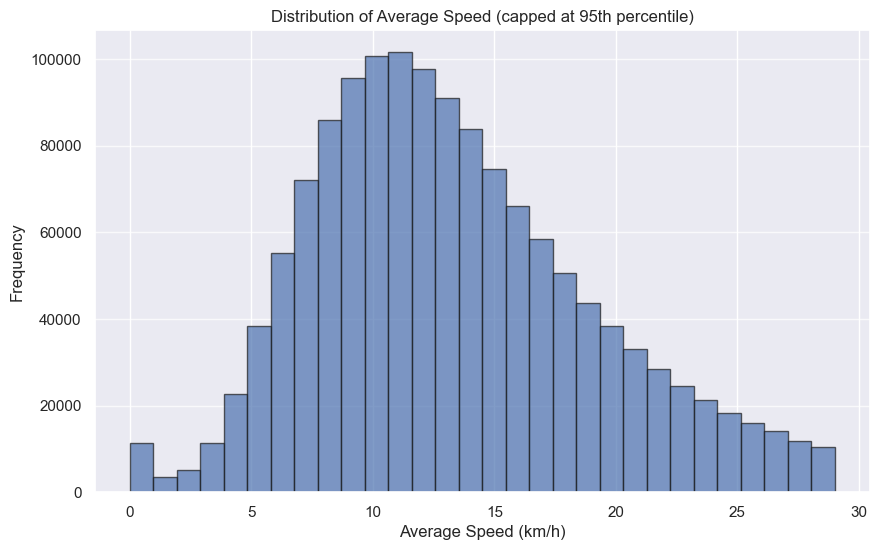

In [25]:
upper_bound = df['average_speed'].quantile(0.95)

reasonable_speeds = df[df['average_speed'] <= upper_bound]

plt.figure(figsize=(10, 6))
plt.hist(reasonable_speeds['average_speed'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Speed (capped at 95th percentile)')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# передал условие в GPT и чуть поиграл с квантилем


Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

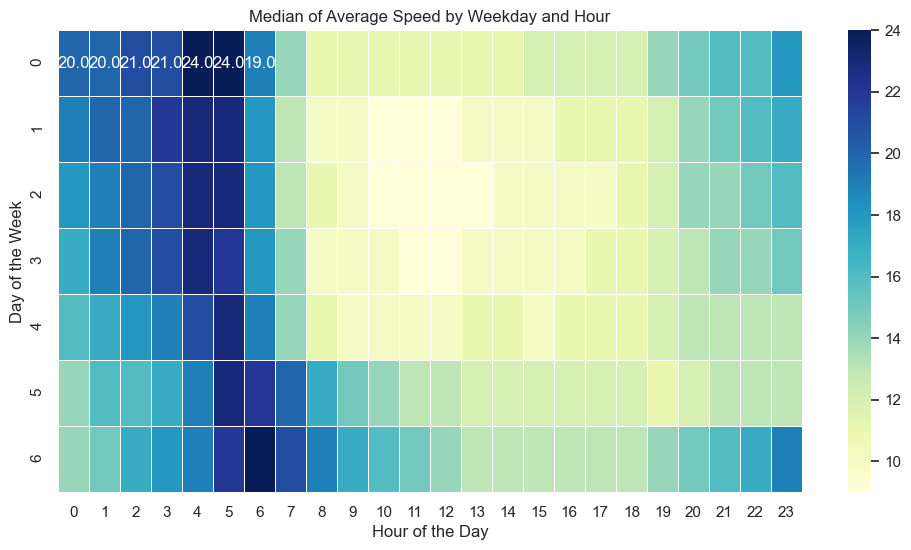

In [26]:
pivot_table = df.pivot_table(values='average_speed', 
                                   index='day_of_week', 
                                   columns='hour', 
                                   aggfunc='median')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Median of Average Speed by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()
# вкинул в GPT условие


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

*Потому что скорость неизвестна до завершения поездки. Если бы мы знали скорость, которая по сути сожержит в себе частично целевую переменную, то могли просто найти продолжительность поездки.*

In [27]:
df = df.drop(columns=['average_speed'])


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.


*Понедельник - минимальна: с 8 до 14, максимальна: с 4 до 5*

*Вторник - минимальна: с 8 до 16, максимальна: с 3 до 5*

*Среда - минимальна: с 8 до 17, максимальна: с 3 до 5*

*Четверг - минимальна: с 8 до 16, максимальна: с 4 до 5*

*Пятница - минимальна: с 9 до 15, максимальна: с 4 до 5*

*Суббота - минимальна: с 13 до 20, максимальна: с 5 до 6*

*Воскресенье - минимальна: с 13 до 18, максимальна: с 5 до 7*

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [28]:
def is_rush_hour(day, hour):
    rush_hours = {
        0: (8, 14),  # Monday
        1: (8, 16),  # Tuesday
        2: (8, 17),  # Wednesday
        3: (8, 16),  # Thursday
        4: (9, 15),  # Friday
        5: (13, 20), # Saturday
        6: (13, 18)  # Sunday
    }
    start, end = rush_hours[day]
    return int(start <= hour <= end)

def is_free_road_hour(day, hour):
    free_road_hours = {
        0: (4, 5),  # Monday
        1: (3, 5),  # Tuesday
        2: (3, 5),  # Wednesday
        3: (4, 5),  # Thursday
        4: (4, 5),  # Friday
        5: (5, 6),  # Saturday
        6: (5, 7)   # Sunday
    }
    start, end = free_road_hours[day]
    return int(start <= hour <= end)

df['is_rush_hour'] = df.apply(lambda row: is_rush_hour(row['day_of_week'], row['hour']), axis=1)
df['is_free_road_hour'] = df.apply(lambda row: is_free_road_hour(row['day_of_week'], row['hour']), axis=1)
# передал в GPT условие

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [29]:
# создаем словарь с названями мест и координатами
locations = {
    'JFK_Terminal_5': (40.64592046881505, -73.77654058583087),
    'JFK_Terminal_4': (40.64410739270207, -73.78240759537037),
    'LGA_Terminal_B': (40.772887467360164, -73.87195376385047),
    'LGA_Terminal_C': (40.77092825007454, -73.86483261846412),
    # 'LGA_Parking': (40.771128796327446, -73.86480160285197),
    # 'South_Ferry': (40.701552105255615, -74.01301049179831),
    # 'World_Trade_Center': (40.711049154762016, -74.01241468373195),
    # 'Grand_Central_Terminal': (40.75264823982336, -73.9771721309206),
    # 'NY_Penn_Station': (40.75105954409153, -73.99146425832943)
}
# создадаим две функции, которые определяют, находится ли место начала/конца поездки рядом с этим местом (в радиусе 500 метров)
def is_start_near(location, pickup_lat, pickup_lon, radius=0.5):
    lat, lon = locations[location]
    return haversine(lat, lon, pickup_lat, pickup_lon) <= radius

def is_end_near(location, dropoff_lat, dropoff_lon, radius=0.5):
    lat, lon = locations[location]
    return haversine(lat, lon, dropoff_lat, dropoff_lon) <= radius

for location in locations.keys():
    df[f'start_near_{location}'] = df.apply(
        lambda row: is_start_near(location, row['pickup_latitude'], row['pickup_longitude']), axis=1
    )
    df[f'end_near_{location}'] = df.apply(
        lambda row: is_end_near(location, row['dropoff_latitude'], row['dropoff_longitude']), axis=1
    )

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

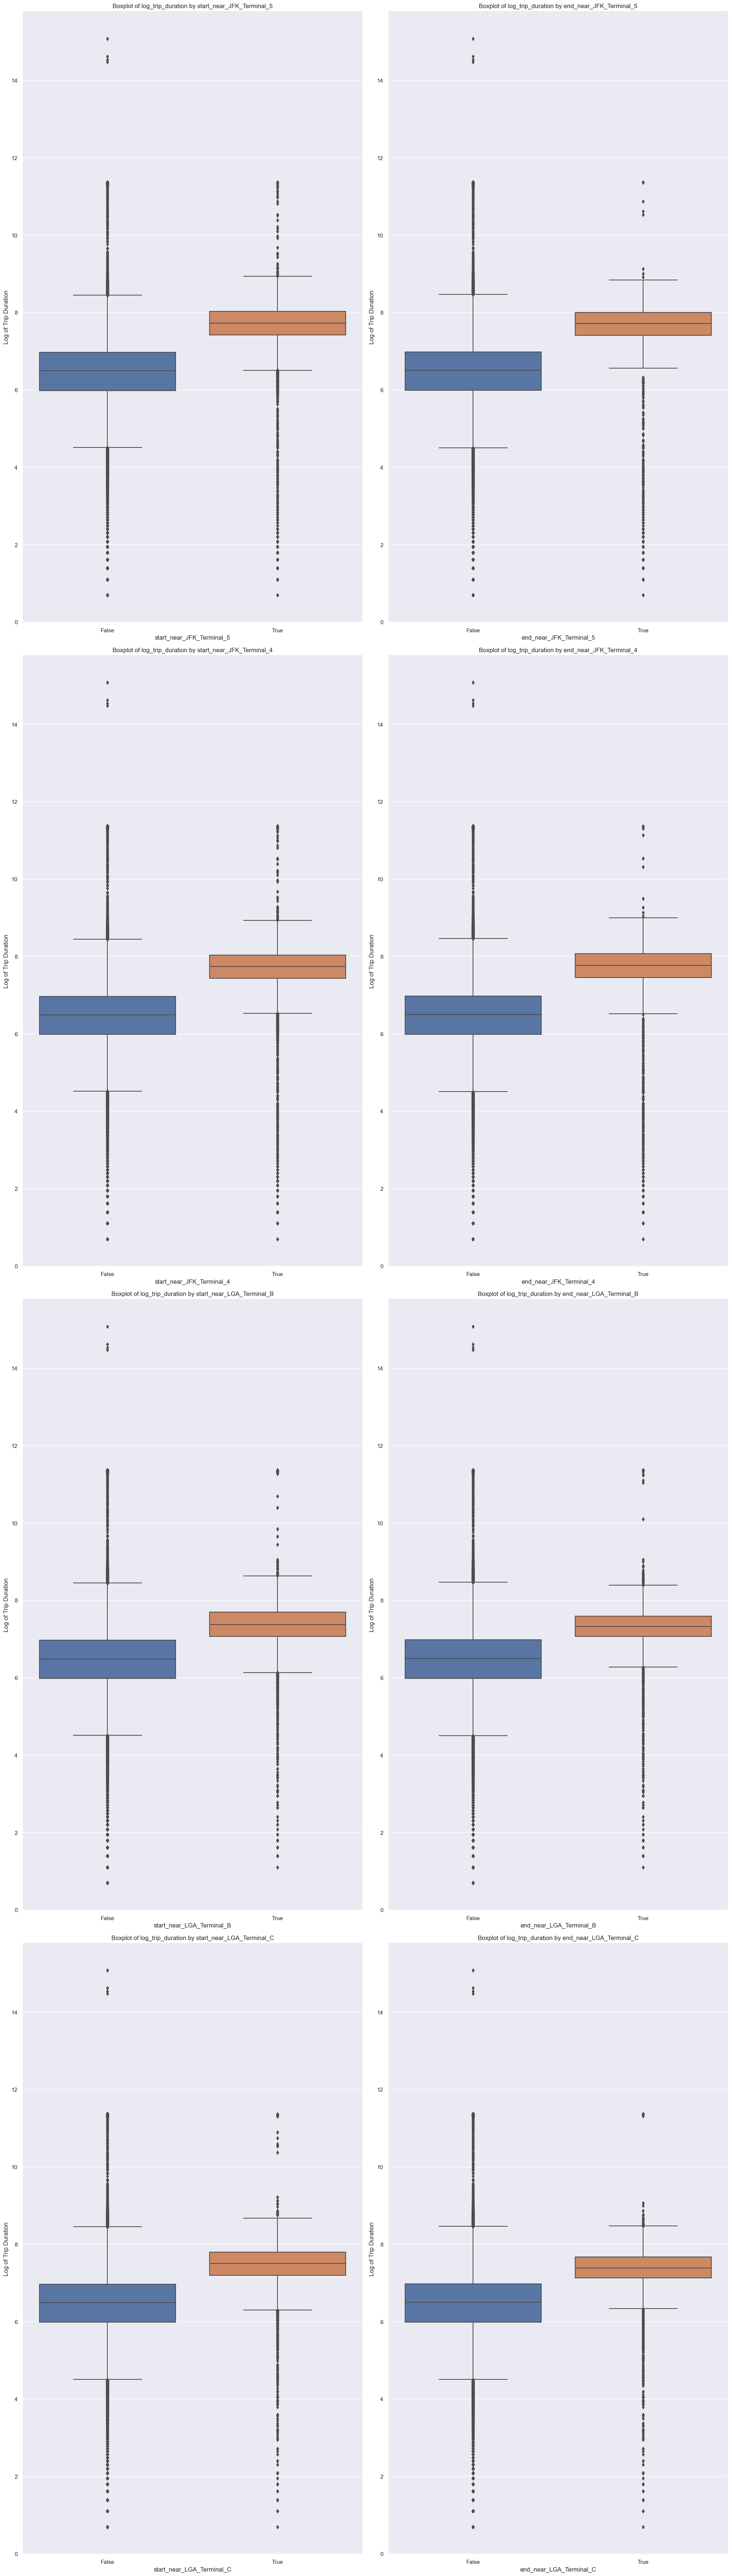

In [30]:
columns = [
    'start_near_JFK_Terminal_5', 'end_near_JFK_Terminal_5',
    'start_near_JFK_Terminal_4', 'end_near_JFK_Terminal_4',
    'start_near_LGA_Terminal_B', 'end_near_LGA_Terminal_B',
    'start_near_LGA_Terminal_C', 'end_near_LGA_Terminal_C',
]

plt.figure(figsize=(20, 70))

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns)//2, 2, i)
    sns.boxplot(data=df, x=column, y='log_trip_duration')
    plt.title(f'Boxplot of log_trip_duration by {column}')
    plt.xlabel(column)
    plt.ylabel('Log of Trip Duration')
    plt.tight_layout()

plt.show();
# GPT-req : Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки



**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

*Да, вообще признаки получились довольно хорошими. Особенно это заметно на признаках конца/начала поездки рядом с аэропортами: ящик с усами выделенных поездок значительно отличается от прочих поездок - мат. ожидание длины поездки сильно больше, а разброс меньше, что говорит о том что мы удачно зафиксировали признак.*

*Менее удачно получилось с поездками от/до вокзалов, так как там разница менее ощутимая. Видимо, из-за того, что они находятся в самом городе и до них не надо далеко ехать.*

P.S. Я удалил точки с вокзалами, потому что код грузился 10 минут

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [31]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cell_width, cell_height):
        self.cell_width = cell_width
        self.cell_height = cell_height

    def fit(self, X, y=None):
        # Находим центральные координаты прямоугольника
        center_lat = X['pickup_latitude'].median()
        center_lon = X['pickup_longitude'].median()

        # Определяем границы прямоугольника
        min_lat = center_lat - 2 * self.cell_height
        max_lat = center_lat + 2 * self.cell_height
        min_lon = center_lon - 1.5 * self.cell_width
        max_lon = center_lon + 1.5 * self.cell_width

        n_rows = 4
        n_cols = 3

        # Сохраняем вычисленные параметры
        self.min_lat = min_lat
        self.max_lat = max_lat
        self.min_lon = min_lon
        self.max_lon = max_lon
        self.n_rows = n_rows
        self.n_cols = n_cols

        return self

    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy['pickup_cell'] = 0
        X_copy['dropoff_cell'] = 0

        outside_pickup_mask = (
            (X_copy['pickup_latitude'] < self.min_lat) | (X_copy['pickup_latitude'] > self.max_lat) | 
            (X_copy['pickup_longitude'] < self.min_lon) | (X_copy['pickup_longitude'] > self.max_lon)
        )
        outside_dropoff_mask = (
            (X_copy['dropoff_latitude'] < self.min_lat) | (X_copy['dropoff_latitude'] > self.max_lat) | 
            (X_copy['dropoff_longitude'] < self.min_lon) | (X_copy['dropoff_longitude'] > self.max_lon)
        )
        
        X_copy['pickup_cell'][outside_pickup_mask] = -1
        X_copy['dropoff_cell'][outside_dropoff_mask] = -1
 
        
        X_copy['raw_pickup'] = np.ceil((X_copy['pickup_latitude'] - self.min_lat)/self.cell_height) 
        X_copy['col_pickup'] = np.ceil((X_copy['pickup_longitude'] - self.min_lon)/self.cell_width)
        X_copy['pickup_cell'][X_copy['pickup_cell'] == 0] = ((X_copy['raw_pickup'] - 1)*self.n_cols + X_copy['col_pickup'])
        
        X_copy['raw_dropoff'] = np.ceil((X_copy['dropoff_latitude'] - self.min_lat)/self.cell_height) 
        X_copy['col_dropoff'] = np.ceil((X_copy['dropoff_longitude'] - self.min_lon)/self.cell_width)
        X_copy['dropoff_cell'][X_copy['dropoff_cell'] == 0] = ((X_copy['raw_dropoff'] - 1)*self.n_cols + X_copy['col_dropoff'])
        
        X_copy = X_copy.drop(columns=['raw_pickup', 'col_pickup', 'raw_dropoff', 'col_dropoff'])

        return X_copy


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [32]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C', 'log_haversine']
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer(cell_width=0.03, cell_height=0.03)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

# Calculate RMSLE (since target is already log-transformed, it's just RMSE)
rmsle_1 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_1)

# взял код с семинара, попросил GPT считать RMSLE


Test RMSLE = 0.4839


Посмотрим, как поделился Нью-Йорк с моим трансформером

In [33]:
def show_circles_on_map(data):
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#1c9099', '#c7c7c7', '#aec7e8'
    ]

    location = (data['pickup_latitude'].mean(), data['pickup_longitude'].mean())
    m = folium.Map(location=location, zoom_start=12)

    for _, row in data.iterrows():
        # Отображение pickup
        pickup_color = colors[row['pickup_cell'] % len(colors)]
        folium.Circle(
            radius=100,
            location=(row['pickup_latitude'], row['pickup_longitude']),
            color=pickup_color,
            fill_color=pickup_color,
            fill=True
        ).add_to(m)

        # Отображение dropoff
        dropoff_color = colors[row['dropoff_cell'] % len(colors)]
        folium.Circle(
            radius=100,
            location=(row['dropoff_latitude'], row['dropoff_longitude']),
            color=dropoff_color,
            fill_color=dropoff_color,
            fill=True
        ).add_to(m)

    return m
map_result = show_circles_on_map(X_train.sample(1000))
map_result

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

1) vendor_id - id перевозчика. Возможно, какие-то переревозчики имеют только такси бизнес-класса, которые заказывают обычно на длительные поездки
2) passenger_count - возможно, тут тоже есть некоторая часть. В длительные поездки люди часто едут вместе (например, в аэропорт семьей)
3) store_and_fwd_flag - Этот признак указывает, был ли поездка сохранена локально в памяти транспортного средства из-за отсутствия соединения с сервером, и затем передана серверу, когда соединение было восстановлено(подсказал GPT). Возможно, в длительныз поездках  такое происходит чаще, особенно если выезжают из NY.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [34]:
df[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()


vendor_id              2
passenger_count       10
store_and_fwd_flag     2
dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

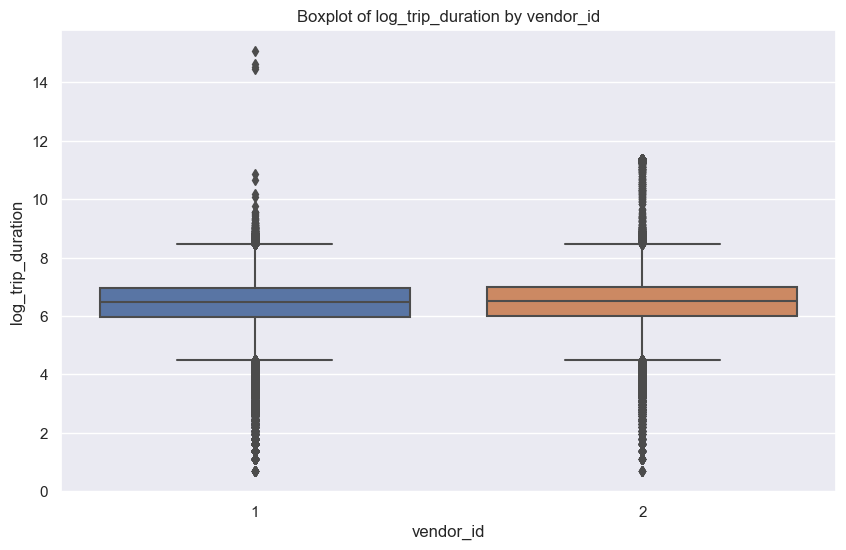

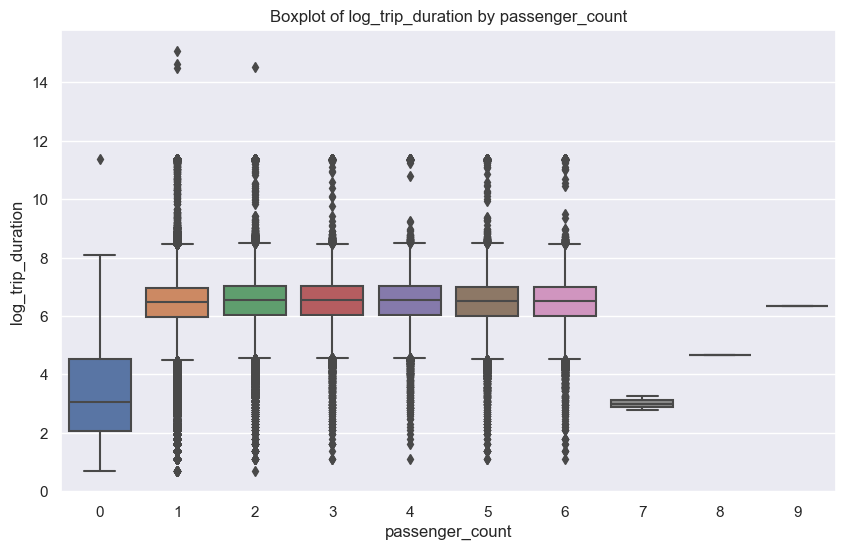

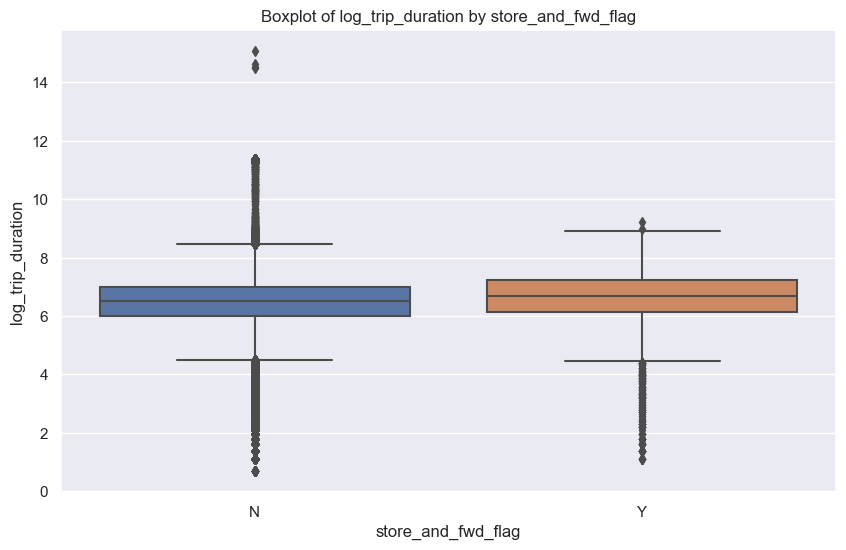

In [35]:
features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

for feature in features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, y='log_trip_duration', data=df)
    plt.title(f'Boxplot of log_trip_duration by {feature}')
    plt.show()
# В GPT - условие задания

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [36]:
df['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

In [37]:
df['vendor_id'][df['vendor_id'] == 1]  = 0
df['vendor_id'][df['vendor_id'] == 2] = 1

In [38]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

In [39]:
df['store_and_fwd_flag'][df['store_and_fwd_flag'] == 'N'] = 1
df['store_and_fwd_flag'][df['store_and_fwd_flag'] == 'Y'] = 0

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [40]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=41)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

# Calculate RMSLE (since target is already log-transformed, it's just RMSE)
rmsle_2 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_2)

# взял код с семинара, попросил GPT считать RMSLE

Test RMSLE = 0.4825


In [41]:
print(rmsle_1 - rmsle_2)

0.001476307118058462


*Улучшение есть, поэтому выкидывать не буду*

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [42]:
transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)

resid_df = df.copy()

X_train_resid = df_train.drop('log_trip_duration', axis=1)
y_train_resid = df_train['log_trip_duration']


X_train_resid['pickup_cell'] = 0
X_train_resid['dropoff_cell'] = 0

transformer.fit(X_train_resid)
resid_df = transformer.transform(X_train_resid)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_resid, y_train_resid)
y_pred = model.predict(X_train_resid)

rmsle_resid = mean_squared_error(y_train_resid, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_resid)
residuals = y_train_resid - y_pred
df['residuals'] = residuals

Test RMSLE = 0.4989


<Axes: xlabel='log_trip_duration', ylabel='Count'>

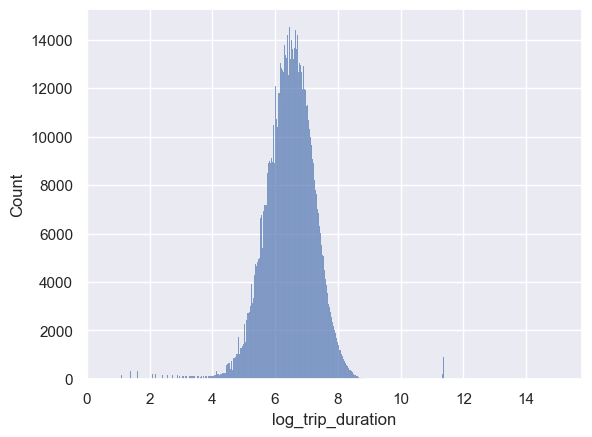

In [43]:
sns.histplot(df['log_trip_duration']) # беру логарифмированные величины, потому что натуральные считаются по 5 мин и плохо отображаются


<Axes: xlabel='log_haversine', ylabel='Count'>

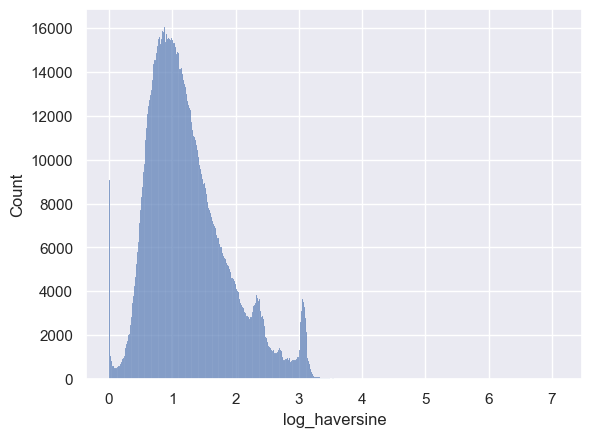

In [44]:
sns.histplot(df['log_haversine'])

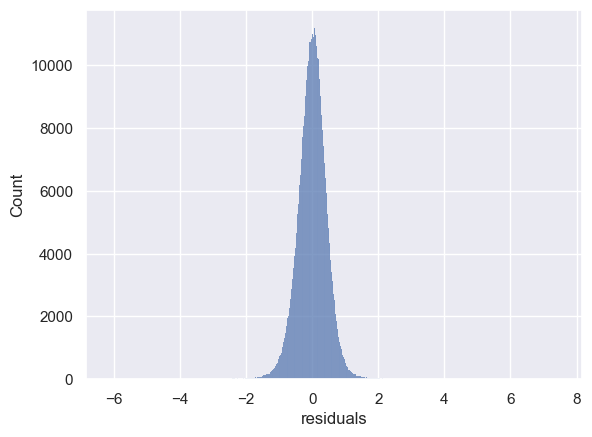

In [45]:
sns.histplot(df['residuals']);

*можно вручную просматривать эти выбросы, а можно воспользоваться методом, который рассматривали на семинаре, он ниже*

In [46]:
n_0 = df.shape[0]

In [47]:
# удалим наблюдения с выбросами 
IQR_data = {}

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    IQR_data[feature] = (Q1, Q3, IQR)
bounds = {}

for feature, data in IQR_data.items():
    Q1, Q3, IQR = data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds[feature] = (lower_bound, upper_bound)

for feature, (lower_bound, upper_bound) in bounds.items():
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
# GPT дал GPT свои пожелания


In [48]:
n_1 = df.shape[0]
print(f'Мы удалили {n_0 - n_1} наблюдений')

Мы удалили 162688 наблюдений


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [49]:
categorial_features = ['hour', 'month']
# тут я специально не рассматриваю признаки, которые создает транформер, хотя они формально тоже категориальные, так как трансформер подразумевает
# использование непосредственно во время обучения модели
for feature in categorial_features:
    print(df[feature].value_counts())
    print('\n')

hour
18    80614
19    80422
21    74784
20    74684
22    71367
17    68185
14    65603
15    63744
12    63721
13    63242
23    61869
11    60616
9     60143
8     59834
10    57945
16    57066
7     49997
0     47311
1     34110
6     30049
2     24743
3     18484
4     13893
5     13530
Name: count, dtype: int64


month
3    227709
4    223392
5    221167
2    211788
6    208595
1    203305
Name: count, dtype: int64




*На самом деле категории в категориальным признакам разбиты достаточно равномерно, выбрасывать что-то нет смысла*

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [50]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer( cell_width=0.03, cell_height=0.035)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=41)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

# Calculate RMSLE (since target is already log-transformed, it's just RMSE)
rmsle_3 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_3)

# взял код с семинара, попросил GPT считать RMSLE

Test RMSLE = 0.4825


In [51]:
print(rmsle_3-rmsle_2)

1.386572993578028e-05


*Модель незначительно улучшилась*

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [52]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell']
# До кодирования
features_before = len(numeric_features) + len(categorial_features)

# После кодирования
ohe = pipeline.named_steps['ohe_and_scaling'].named_transformers_['ohe']
features_after_encoding = len(ohe.get_feature_names_out())
features_after = len(numeric_features) + features_after_encoding

print(f"Количество признаков до кодирования: {features_before}")
print(f"Количество признаков после кодирования: {features_after}")
# GPT-requests:
# 1 - условие
# 2 - Можно ли как-то это сделать, не используя OHE еще раз, а работая с pipeline?


Количество признаков до кодирования: 21
Количество признаков после кодирования: 73


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [53]:
from sklearn.linear_model import Lasso
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=41)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

# Calculate RMSLE (since target is already log-transformed, it's just RMSE)
rmsle_4 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_4);

# взял код с семинара, попросил GPT считать RMSLE

Test RMSLE = 0.7951


In [54]:
rmsle_3 - rmsle_4

-0.31266891835299476

*Качество модели сильно ухушилось, Lasso показывает себя значительно хуже*

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

для Lasso

In [55]:
transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)
validation_df = df_train.copy(deep=True)
alphas = []
rmsles = []

for alpha in np.logspace(-4, 4, 20):
    df_train, df_test = train_test_split(validation_df, test_size=0.2, random_state=41)
    X_train = df_train.drop('log_trip_duration', axis=1)
    y_train = df_train['log_trip_duration']
    X_test = df_test.drop('log_trip_duration', axis=1)
    y_test = df_test['log_trip_duration']

    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
        ('scaling', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])

    model = pipeline.fit(X_train[all_features], y_train)
    y_pred = model.predict(X_test[all_features])

    rmsle = mean_squared_error(y_test, y_pred, squared=False)
    alphas.append(alpha)
    rmsles.append(rmsle)
print(min(rmsles))

0.4784467702744191


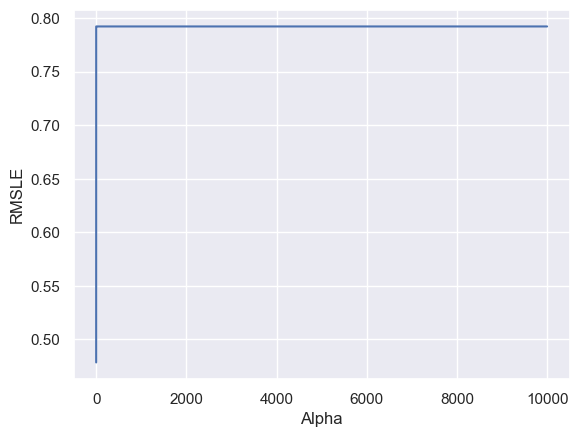

In [56]:
data = pd.DataFrame({
    'Alpha': alphas,
    'RMSLE': rmsles
})
sns.lineplot(data=data, x='Alpha', y='RMSLE');


In [57]:
data[data['RMSLE'] == data['RMSLE'].min()]

,Alpha,RMSLE
0,0.0001,0.478447


для Ridge

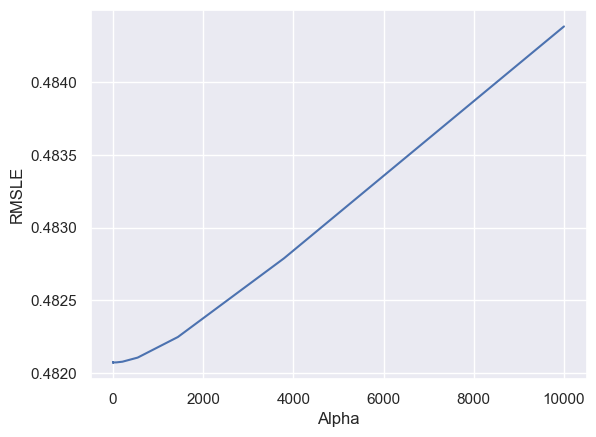

In [58]:
transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)
validation_df = df_train.copy(deep=True)
alphas = []
rmsles = []
df_train, df_test = train_test_split(validation_df, test_size=0.2, random_state=41)

for alpha in np.logspace(-4, 4, 20):
    X_train = df_train.drop('log_trip_duration', axis=1)
    y_train = df_train['log_trip_duration']
    X_test = df_test.drop('log_trip_duration', axis=1)
    y_test = df_test['log_trip_duration']

    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
        ('scaling', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Ridge(alpha=alpha))
    ])

    model = pipeline.fit(X_train[all_features], y_train)
    y_pred = model.predict(X_test[all_features])
    rmsle = mean_squared_error(y_test, y_pred, squared=False)
    alphas.append(alpha)
    rmsles.append(rmsle)
data = pd.DataFrame({
    'Alpha': alphas,
    'RMSLE': rmsles
})
sns.lineplot(data=data, x='Alpha', y='RMSLE');

In [59]:
data[data['RMSLE'] == data['RMSLE'].min()]

,Alpha,RMSLE
12,11.288379,0.482074


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

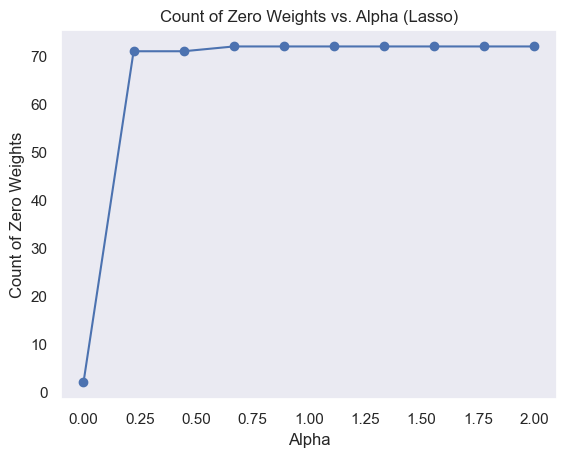

Минимальное alpha для избавления от половины признаков: 0.2222222222222222


In [60]:
alphas = np.linspace(0, 2, 10)
zero_weights_counts = []

for alpha in alphas:
    df_train, df_test = train_test_split(validation_df, test_size=0.2, random_state=41)
    X_train = df_train.drop('log_trip_duration', axis=1)
    y_train = df_train['log_trip_duration']
    X_test = df_test.drop('log_trip_duration', axis=1)
    y_test = df_test['log_trip_duration']

    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
        ('scaling', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])

    model = pipeline.fit(X_train[all_features], y_train)
    zero_weights_count = np.sum(np.abs(model.named_steps['regression'].coef_) == 0)  # Подсчет нулевых весов
    zero_weights_counts.append(zero_weights_count)

# Построение графика
plt.plot(alphas, zero_weights_counts, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Count of Zero Weights')
plt.title('Count of Zero Weights vs. Alpha (Lasso)')
plt.grid()
plt.show()

# Находим минимальное alpha, которое позволяет избавиться от половины признаков
half_features_count = len(all_features) // 2
min_alpha_half_features = None
for alpha, zero_count in zip(alphas, zero_weights_counts):
    if zero_count >= half_features_count:
        min_alpha_half_features = alpha
        break

print(f"Минимальное alpha для избавления от половины признаков: {min_alpha_half_features}")
# скинул GPT код, попросил посчитать веса


*Да, мы сильно потеряем в качестве, так как из предыдущих графиков видно, что даже незначительно увеличение alpha вызывае проседание качества*

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

*Это линейная регрессия, а не нейронная модель. Она может знать о связи каждого из этих признаков с целевой переменной, но не о связи двух этух признаков,поэтому эту связь мы вводим вручную. Такой признак может быть очень полезен, потому что он прогнозирует потенциально далекие поездки из одной части города в другую*

In [61]:
transformer.fit(df)
df = transformer.transform(df)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,end_near_JFK_Terminal_5,start_near_JFK_Terminal_4,end_near_JFK_Terminal_4,start_near_LGA_Terminal_B,end_near_LGA_Terminal_B,start_near_LGA_Terminal_C,end_near_LGA_Terminal_C,residuals,pickup_cell,dropoff_cell
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,1,6.122493,...,False,False,False,False,False,False,False,NaN,8,9
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,1,6.498282,...,False,False,False,False,False,False,False,0.427136,5,4
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,1,7.661527,...,False,False,False,False,False,False,False,0.246293,8,1
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,1,6.063785,...,False,False,False,False,False,False,False,-0.088996,4,1
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,1,6.077642,...,False,False,False,False,False,False,False,-0.016490,11,8


In [62]:
route_pairs = df[['pickup_cell', 'dropoff_cell']]
route_pairs['route_pair'] = list(zip(route_pairs['pickup_cell'], route_pairs['dropoff_cell']))
pair_counts = route_pairs.groupby('route_pair').size().reset_index(name='pair_count')
top_pairs = pair_counts.nlargest(100, 'pair_count')
pair_to_index = {pair: index for index, pair in enumerate(top_pairs['route_pair'], start=1)}
df['route_pair_encoded'] = df.apply(lambda row: pair_to_index.get((row['pickup_cell'], row['dropoff_cell']), -1), axis=1)
# использовал GPT


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [63]:
df['route_pair_encoded'].value_counts()

route_pair_encoded
1      144276
2      122150
3       74912
4       74173
5       73758
        ...  
96        604
97        603
98        595
99        587
100       586
Name: count, Length: 101, dtype: int64

In [64]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell', 'route_pair_encoded']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=41)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=0))
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

rmsle_5 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_5)

Test RMSLE = 0.4743


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

*Оно так называется, потому что считает расстояние не напрямую, а как бы углами, двигаясь только условно влево и вправо (а не на исксь). Оно так называется, потому что все дороги в манхэттене идут параллельно. Таким образом, манхэттенское расстояние условно может нам более точно показать, какую дистанцию проезжают таксисты в нью йорке*

Алгоритм действий 
* Перевожу градусы в плоские координаты
* Поворачиваю плоские координаты так, чтобы они были параллельны улицам Манхэттена
* Записываю новые координаты
* Считаю манхэттенское расстояние

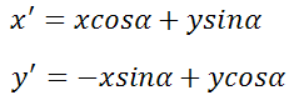

In [65]:
!pip install pyproj
import pyproj

# Создание проекторов для преобразования координат
wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')
mercator = pyproj.Proj(proj='merc', datum='WGS84')

def convert_coords(lon, lat):
    return pyproj.transform(wgs84, mercator, lon, lat)

# Преобразование координат pickup и dropoff в плоские картецианские координаты
df['pickup_x'], df['pickup_y'] = convert_coords(df['pickup_longitude'], df['pickup_latitude'])
df['dropoff_x'], df['dropoff_y'] = convert_coords(df['dropoff_longitude'], df['dropoff_latitude'])

# Угол в радианах
alpha = np.radians(-29)

# Вычисляем значения sin и cos
sina = np.sin(alpha)
cosa = np.cos(alpha)

# Применяем преобразование для pickup и dropoff координат в плоской системе
df['pickup_x_prime'] = df['pickup_x'] * cosa + df['pickup_y'] * sina
df['pickup_y_prime'] = -df['pickup_x'] * sina + df['pickup_y'] * cosa

df['dropoff_x_prime'] = df['dropoff_x'] * cosa + df['dropoff_y'] * sina
df['dropoff_y_prime'] = -df['dropoff_x'] * sina + df['dropoff_y'] * cosa

# Вычисляем манхэттенское расстояние в новой системе координат
df['manhattan_distance'] = np.abs(df['dropoff_x_prime'] - df['pickup_x_prime']) + np.abs(df['dropoff_y_prime'] - df['pickup_y_prime'])

# Вычисляем логарифм этого расстояния
df['log_manhattan_distance'] = np.log1p(df['manhattan_distance'])


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\rusta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [66]:
print("Correlation between log_manhattan_distance and target:", df['log_manhattan_distance'].corr(df['log_trip_duration']))

Correlation between log_manhattan_distance and target: 0.7304487079460891


In [67]:
df['log_manhattan_distance'].corr(df['log_haversine'])

0.8821765675411033

In [68]:
df['log_trip_duration'].corr(df['log_haversine'])

0.7511938026788874

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [69]:
numeric_features = ['day_of_week', 'dayofyear', 'is_anomal', 'is_rush_hour', 'is_free_road_hour', 'start_near_JFK_Terminal_5',
       'end_near_JFK_Terminal_5', 'start_near_JFK_Terminal_4',
       'end_near_JFK_Terminal_4', 'start_near_LGA_Terminal_B',
       'end_near_LGA_Terminal_B', 'start_near_LGA_Terminal_C',
       'end_near_LGA_Terminal_C',  'passenger_count', 'log_haversine', 'store_and_fwd_flag', 'vendor_id', 'log_manhattan_distance']
# признаки, которые мы перевели в 0 и 1 теперь можно не кодировать
categorial_features = ['hour', 'month', 'pickup_cell', 'dropoff_cell', 'route_pair_encoded']
all_features = numeric_features + categorial_features

transformer = MapGridTransformer(cell_width=0.03, cell_height=0.035)


df_train, df_test = train_test_split(df, test_size=0.3, random_state=41)
X_train = df_train.drop('log_trip_duration', axis=1)
y_train = df_train['log_trip_duration']
X_test = df_test.drop('log_trip_duration', axis=1)
y_test = df_test['log_trip_duration']

transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=0))
])

model = pipeline.fit(X_train[all_features], y_train)
y_pred = model.predict(X_test[all_features])

rmsle_6 = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSLE = %.4f" % rmsle_6)

Test RMSLE = 0.4682


In [70]:
print(F'Получилось улучшить модель на {rmsle_5-rmsle_6}')

Получилось улучшить модель на 0.00612058049719072


*Примечательно, что если оставлять оба признака, то модель улучшается, а если оставлять только манхэттенское расстояние, то скор ухудшается. Это может объясняться тем, что в целом обычное расстояние лучше подходит для определения времени поездки, однако в некоторых ситуациях, возможно, в определенных маршрутах, манхэттенское расстояние позволяет дополнить данные и улучшить прогноз.*

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [71]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

GPT очень помогал в работе, сильно экономил времени, но самое эффективное, как с ним работать - это писать свой код, потом закидывать в GPT для доработки